# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.123018e+01     8.414866e+00
 * time: 0.004110097885131836
     1     2.735571e+01     5.055699e+00
 * time: 0.012492179870605469
     2     2.007150e+01     7.585073e+00
 * time: 0.03301715850830078
     3     1.209431e+01     1.671150e+00
 * time: 0.05507206916809082
     4     1.123216e+01     2.454094e+00
 * time: 0.06967806816101074
     5     1.075870e+01     1.488134e+00
 * time: 0.08426904678344727
     6     1.008926e+01     2.476150e+00
 * time: 0.09879422187805176
     7     9.416555e+00     1.297417e+00
 * time: 0.11343812942504883
     8     9.068723e+00     8.800781e-01
 * time: 0.12813520431518555
     9     8.878706e+00     9.909338e-01
 * time: 0.14286303520202637
    10     8.745431e+00     5.835814e-01
 * time: 0.15821599960327148
    11     8.703689e+00     1.087375e+00
 * time: 0.16988611221313477
    12     8.652273e+00     5.991050e-01
 * time: 0.18161821365356445
    13     8.597832e+00     2.691569e-01
 * tim

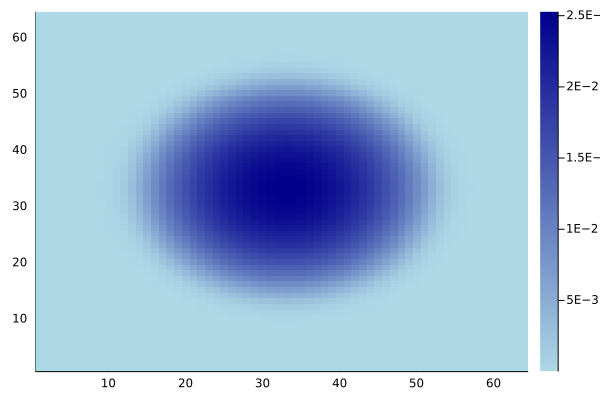

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)